_NOTA: ALGUNAS CELDAS PUEDEN DIFERIR CONTRA LO QUE SE VIO EN CLASE, PRINCIPALMENTE AQUELLAS QUE HACEN USO DE NUMPY. ESTO SE DEBE A QUE LO ACTUALICÉ A LA VERSIÓN MÁS RECIENTE. DE CUALQUIER FORMA ESTO NO AFECTA EN ABSOLUTO A SU CORRECTO FUNCIONAMIENTO, POR LO QUE NINGÚN CAMBIO FUE NECESARIO._

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
kernel_laplace1 = np.array([[0, 1, 0], 
                           [1, -4, 1], 
                           [0, 1, 0]])

In [3]:
kernel_laplace1.sum()

np.int64(0)

In [4]:
kernel_laplace1.shape

(3, 3)

In [5]:
sudoku = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic24/images/sudoku.png", 0)

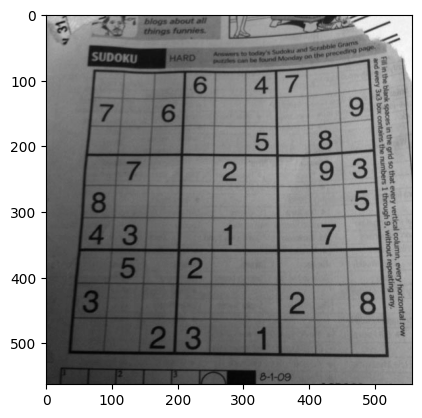

In [6]:
plt.imshow(sudoku, "gray")
plt.show()

In [7]:
sudoku_fil = cv.filter2D(sudoku, -1, kernel_laplace1)

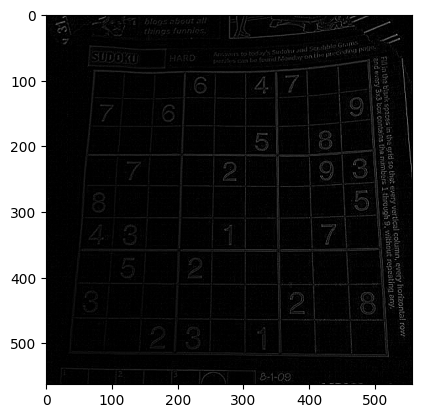

In [8]:
plt.imshow(sudoku_fil, "gray")
plt.show()

In [9]:
np.unique(sudoku_fil)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 129, 131, 134,
       139, 140, 148, 156, 165], dtype=uint8)

In [10]:
kernel_laplace2 = np.array([[0, -1, 0], 
                           [-1, 4, -1], 
                           [0, -1, 0]])

In [11]:
kernel_laplace2.sum().item() # item() para obtener sólo el resultado y no el tipo de dato de NumPy

0

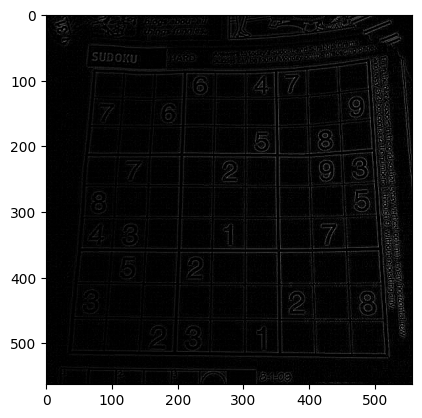

In [12]:
plt.imshow(cv.filter2D(sudoku, -1, kernel_laplace2), "gray")
plt.show()

In [13]:
kernel_laplace3 = np.array([[1, 1, 1], 
                           [1, -8, 1], 
                           [1, 1, 1]])

In [14]:
kernel_laplace3.sum()

np.int64(0)

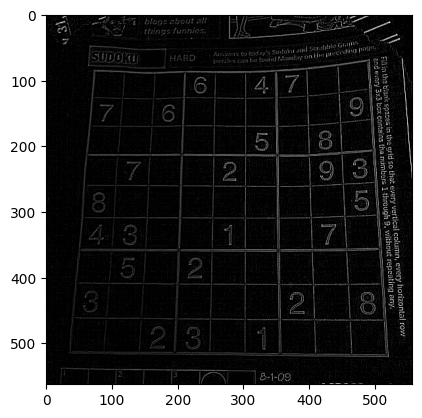

In [15]:
plt.imshow(cv.filter2D(sudoku, -1, kernel_laplace3), "gray")
plt.show()

In [16]:
kernel_laplace4 = kernel_laplace3 * -1

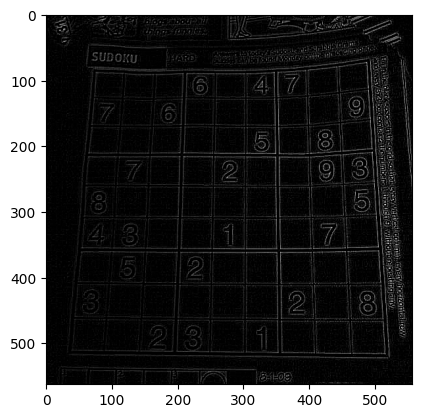

In [17]:
plt.imshow(cv.filter2D(sudoku, -1, kernel_laplace4), "gray")
plt.show()

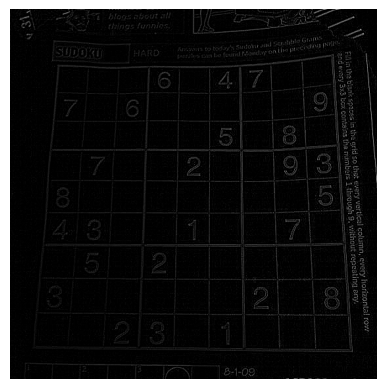

In [18]:
plt.imshow(cv.Laplacian(sudoku, -1), "gray")
plt.axis("off")
plt.show()


In [19]:
np.round(1.4)

np.float64(1.0)

$\lfloor{\sigma}\rfloor$

In [20]:
np.floor(1.999999999)

np.float64(1.0)

$\lceil{\sigma}\rceil$

In [21]:
np.ceil(1.000000001)

np.float64(2.0)

---
Clase de 11 de octubre

## Desenfoque Gaussiano

In [46]:
sudoku_gauss = cv.GaussianBlur(sudoku, (7, 7), sigmaX=2)

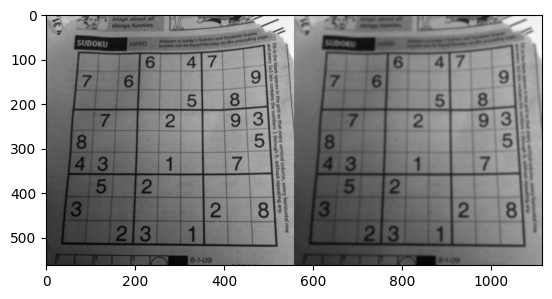

In [47]:
plt.imshow(np.hstack((sudoku, sudoku_gauss)), "gray")
plt.show()

In [57]:
cv.getGaussianKernel(4, 1)

array([[0.12254251],
       [0.37745749],
       [0.37745749],
       [0.12254251]])

In [56]:
cv.filter2D(sudoku, -1, cv.getGaussianKernel(4, 1))

array([[168, 164, 164, ..., 206, 206, 206],
       [168, 164, 164, ..., 206, 206, 206],
       [167, 163, 164, ..., 206, 206, 206],
       ...,
       [ 44,  44,  43, ..., 132, 135, 134],
       [ 46,  47,  46, ..., 134, 134, 132],
       [ 47,  48,  47, ..., 133, 133, 131]], dtype=uint8)

In [58]:
kernel_deseado = 5

img = np.zeros((kernel_deseado + 2, kernel_deseado + 2))

In [60]:
img[3, 3] = 1

In [61]:
img

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [65]:
# Kernel Gaussiano Normalizado
cv.GaussianBlur(img, (kernel_deseado, kernel_deseado), 0).sum().item()

1.0

In [66]:
img

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [69]:
img.flatten()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

---
Filtro de mediana

In [70]:
tigre = cv.imread("/Users/miguelcamargorojas/Documents/UP/PDI-Ago-dic24/images/s&p-noise.jpeg", 0)

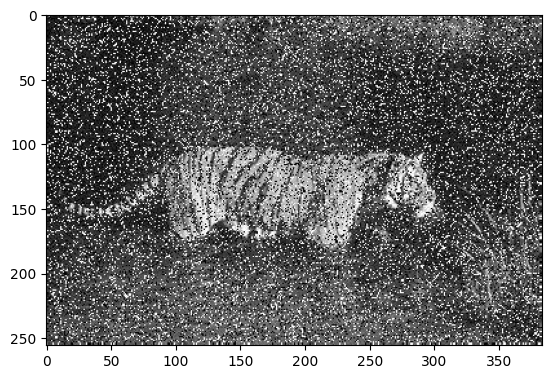

In [71]:
plt.imshow(tigre, "gray")
plt.show()

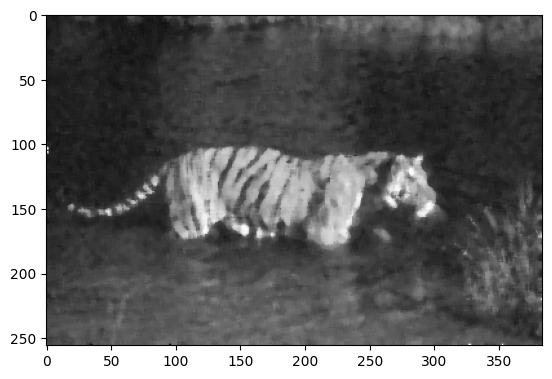

In [80]:
plt.imshow(cv.medianBlur(tigre, 5), "gray")
plt.show()